# Smartphone-Based Recognition of Human Activities and Postural Transitions Data Set  - ESILV -  A5 - Pierrick Pujol

https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions

# Importing the libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier

from joblib import load, dump

import warnings
warnings.filterwarnings("ignore")

# Data loading

In [40]:
train = pd.read_csv('ouputScripts/train.csv')
test = pd.read_csv('ouputScripts/test.csv')

**I created these CSV files from a python script (which processes the original dataset), the python script is provided in my github, this allows me to use the data more easily**

# Data preprocessing

**The first part of the data preprocessing was carried out with the script scriptToConvertDatasetInCsv, this involves converting the text files supplied into a csv file, in order to facilitate the use of the data.**

**We can first check that there is no lack of value**

In [41]:
print('The number of missing values in train file is : ', train.isna().values.sum())
print('The number of missing values in test file is : ', test.isna().values.sum())

The number of missing values in train file is :  0
The number of missing values in test file is :  0


**We can then verify that there is no duplicate value**

In [42]:
print('The number of duplicates in train file is : ', sum(train.duplicated()))
print('The number of duplicates in test file is : ', sum(test.duplicated()))

The number of duplicates in train file is :  0
The number of duplicates in test file is :  0


**We check the datatypes of the 2 files** 

In [43]:
train.dtypes.value_counts()

float64    561
object       1
int64        1
dtype: int64

In [44]:
test.dtypes.value_counts()

float64    561
object       1
int64        1
dtype: int64

**We can check if we need to scale the dataset**

In [45]:
train.describe() 

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888,17.400154
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196,8.968729
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874,1.000000
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560,8.000000
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583,19.000000
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000,30.000000


In general the fact of scaling a dataset makes it possible to improve the accuracy of the models.

I firstly check the maximum and minimum (range) for each dataset.

We can see that the values are between -1 and +1, so it is not necessary to scale.

# Data Visualisation 

In [46]:
# It allows to concatenate the pandas object along the axis 0
data_of_train_and_test = pd.concat([train, test], axis = 0).reset_index(drop = True)

# It allows to group and count the main columns names
pd.DataFrame.from_dict(Counter([columns.split('-')[0] for columns in data_of_train_and_test.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAccJerk,79
fBodyGyro,79
fBodyAcc,79
tBodyGyroJerk,41
tBodyAcc,41
tBodyGyro,41
tBodyAccJerk,41
tGravityAcc,40
tBodyAccMag,13
tGravityAccMag,13


1. fBodyAcc* = acceleration feature
2. fBodyGyro* = gyroscope feature
3. tGravity* = gravity feature 

**We can see that there are mainly gyroscope and acceleration features**

**Checking for class imbalance**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

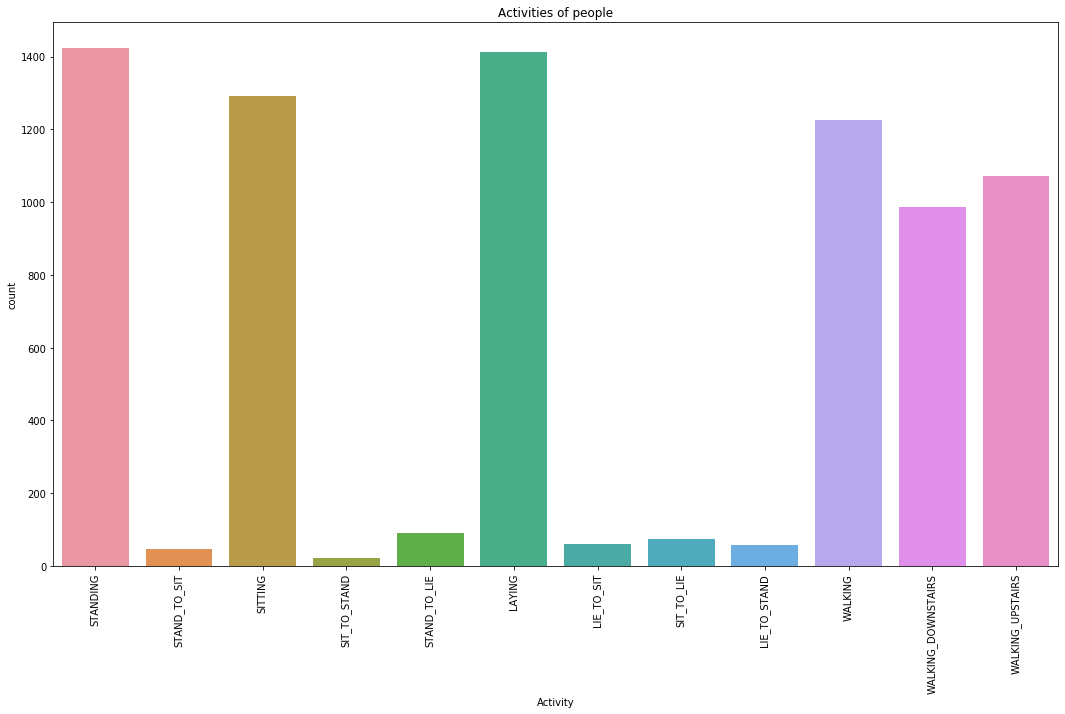

In [47]:
plt.figure(figsize = (18,10))
plt.title('Activities of people')
sns.countplot(train.Activity)
plt.xticks(rotation = 90)

**As we can see above, the data of postural transitions represent a minority of the dataset**

The activities are not unbalanced, there are roughly the same number of samples for each static activity. It's the same for the postural transitions, there are roughly the same number of samples for each type of postural transitions.

In [48]:
# to remove columns not used for data representation
x_value_for_tSNE = train.drop(['subject', 'Activity'], axis = "columns")

In [49]:
t_SNE = TSNE(random_state = 12, n_components=2, verbose=1, perplexity=40, n_iter=2000).fit_transform(x_value_for_tSNE)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.596s...
[t-SNE] Computed neighbors for 7767 samples in 66.323s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.384989
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.991096
[t-SNE] KL divergence after 2000 iterations: 1.292471


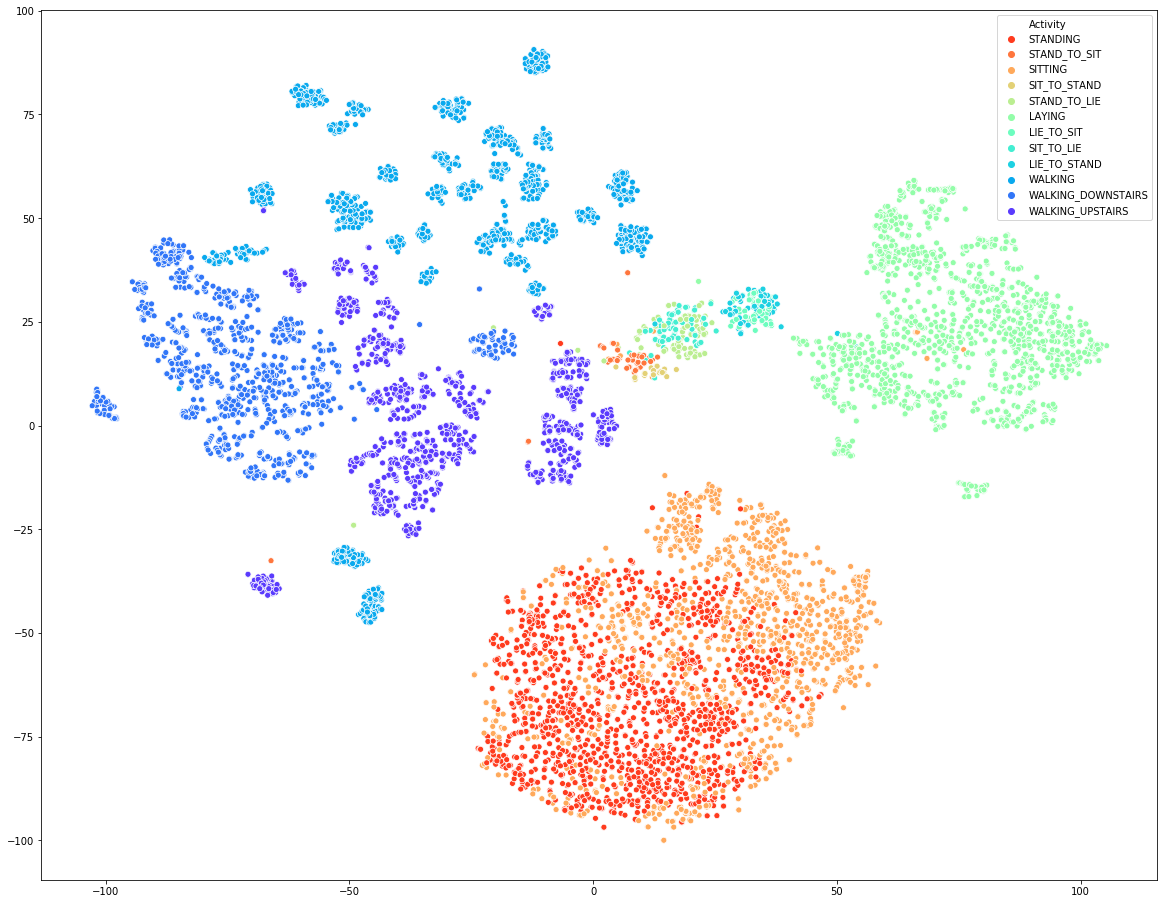

In [50]:
plt.figure(figsize = (20,16))

sns.scatterplot(x = t_SNE[:, 0], y = t_SNE[:, 1], hue = train["Activity"], palette = "rainbow_r")

**As we can see above, some data seems more difficult to separate than others, 
for example standing and sitting data seem rather mixed, there is also this problem with the activities walking and walking upstairs**

# Data Modelling

In [51]:
# to remove columns subject and activity
X_train = train.drop(['subject', 'Activity'], axis = 1)
X_test = test.drop(['subject', 'Activity'], axis = 1)

y_train = train.Activity
y_test = test.Activity

print('The size of the training data size is : ', X_train.shape)
print('The size of the test data size : ', X_test.shape)

# array to contain the name of the algorithms
algo = []
# table to contain the score of the algorithms
scores = []

The size of the training data size is :  (7767, 561)
The size of the test data size :  (3162, 561)


**70% of the volunteers were selected for generating the training data and 30% the test data**

**We use randomised search, which is more flexible and more efficient than a grid search**

## Creation of a logistic regression model  with hyperparameter tuning

In [76]:
parameters = {'C':np.arange(20,100,5), 'penalty':['l2','l1']}

logisticRegression_classifier = LogisticRegression()
logisticRegression_classifier_rs = RandomizedSearchCV(logisticRegression_classifier, param_distributions=parameters, cv=5, random_state = 12)
logisticRegression_classifier_rs.fit(X_train, y_train)

y_pred = logisticRegression_classifier_rs.predict(X_test)

In [53]:
logisticRegression_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

algo.append("Logistic Regression")
scores.append(logisticRegression_accuracy)

print("Accuracy using Logistic Regression : ", logisticRegression_accuracy)


Accuracy using Logistic Regression :  0.939595192915876


In [54]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Function to print the confusion matrix : https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

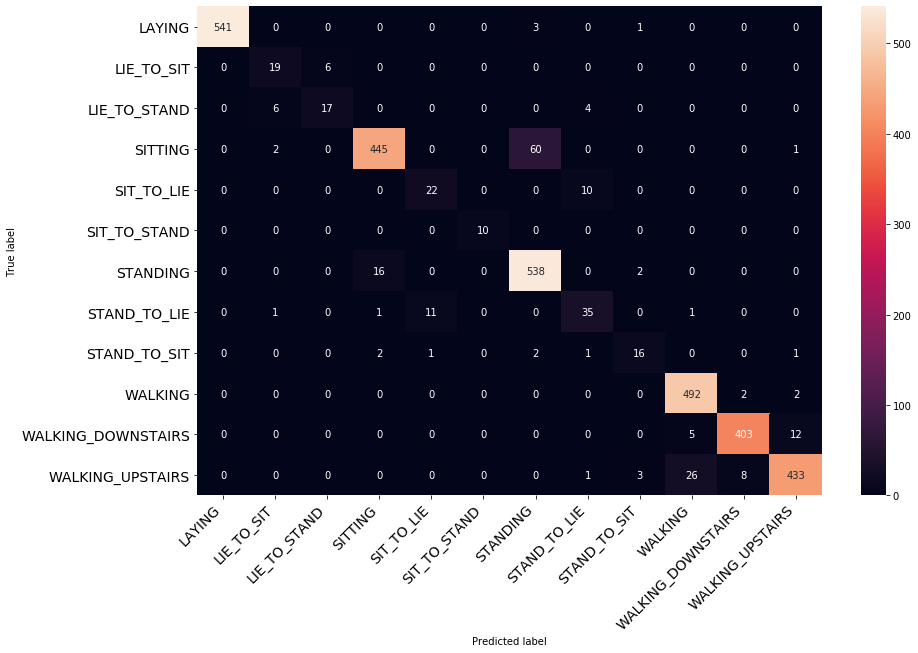

In [55]:
cm = confusion_matrix(y_test.values,y_pred)
print_confusion_matrix(cm,  np.unique(y_pred), figsize = (14,9), fontsize=14)

In [56]:
# To get the best random search attributes for the model
print("Best estimator : ", logisticRegression_classifier_rs.best_estimator_)
print("Best set of parameters : ", logisticRegression_classifier_rs.best_params_)
print("Best score : ", logisticRegression_classifier_rs.best_score_)

Best estimator :  LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best set of parameters :  {'penalty': 'l2', 'C': 30}
Best score :  0.9199247357006533


## Creation of LGBM classifier

**I did not perform hyperparameter tuning for this model because the creation time of the LGBMClassifier model is much too high with the addition of hyperparameter tuning**

In [57]:

#n_estimators (int, optional (default=100)) – Number of boosted trees to fit.
lgbm = LGBMClassifier(n_estimators=500)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [58]:
lgbm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using lgbm : ", lgbm_accuracy)

algo.append("LGBM classifier")
scores.append(lgbm_accuracy)

Accuracy using lgbm :  0.9225173940543959


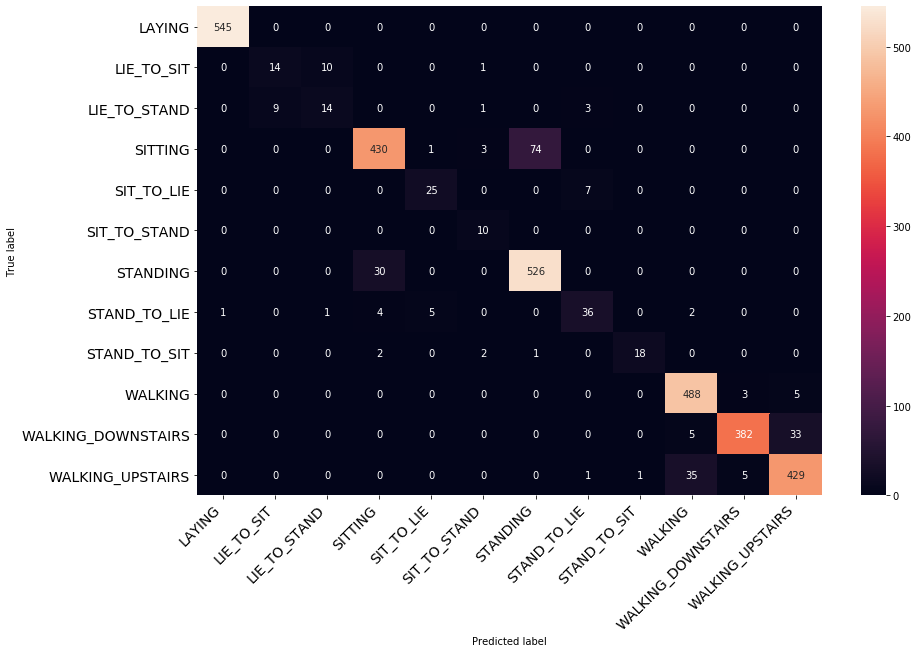

In [59]:
cm = confusion_matrix(y_test.values,y_pred)
print_confusion_matrix(cm,  np.unique(y_pred), figsize = (14,9), fontsize=14)

## Creation of linear SVC model with hyperparameter Tuning

In [77]:
parameters = {'C':np.arange(1,15,1)}
linear_SVCm = LinearSVC(tol = 0.0001)
linear_SVCm_rs = RandomizedSearchCV(linear_SVCm, param_distributions=parameters, random_state = 12)
linear_SVCm_rs.fit(X_train, y_train)
y_pred = linear_SVCm_rs.predict(X_test)

In [78]:
linear_SVCm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy using linear SVC : ",linear_SVCm_accuracy)

algo.append("Linear SVC")
scores.append(linear_SVCm_accuracy)

Accuracy using linear SVC :  0.9452877925363694


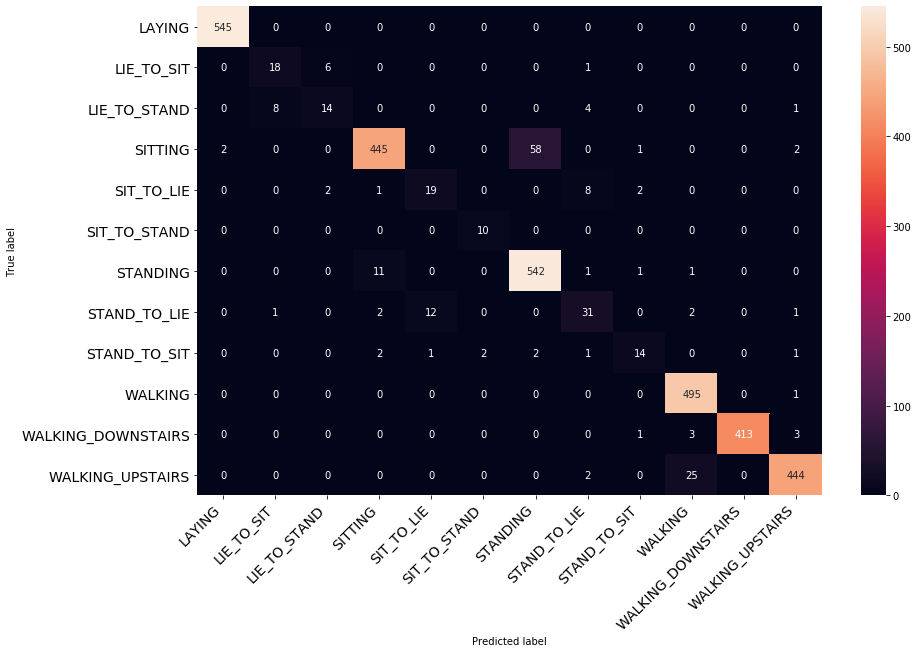

In [62]:
cm = confusion_matrix(y_test.values,y_pred)
print_confusion_matrix(cm, np.unique(y_pred), figsize = (14,9), fontsize=14)

In [63]:
# To get the best random search attributes for the model
print("Best estimator : ", linear_SVCm_rs.best_estimator_)
print("Best set of parameters : ", linear_SVCm_rs.best_params_)
print("Best score : ", linear_SVCm_rs.best_score_)

Best estimator :  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best set of parameters :  {'C': 1}
Best score :  0.9318994829619427


## Creation of decision tree classifier with hyperparameter Tuning

In [64]:
parameters = {'max_depth':np.arange(2,12,1)}
decisionTree_classifier = DecisionTreeClassifier()
decisionTree_classifier_rs = RandomizedSearchCV(decisionTree_classifier,param_distributions = parameters,random_state = 12)
decisionTree_classifier_rs.fit(X_train, y_train)
y_pred = decisionTree_classifier_rs.predict(X_test)

In [65]:
decisionTree_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy using Decision Tree : ", decisionTree_accuracy)

algo.append("Decision tree")
scores.append(decisionTree_accuracy)

Accuracy using Decision Tree :  0.8077166350411132


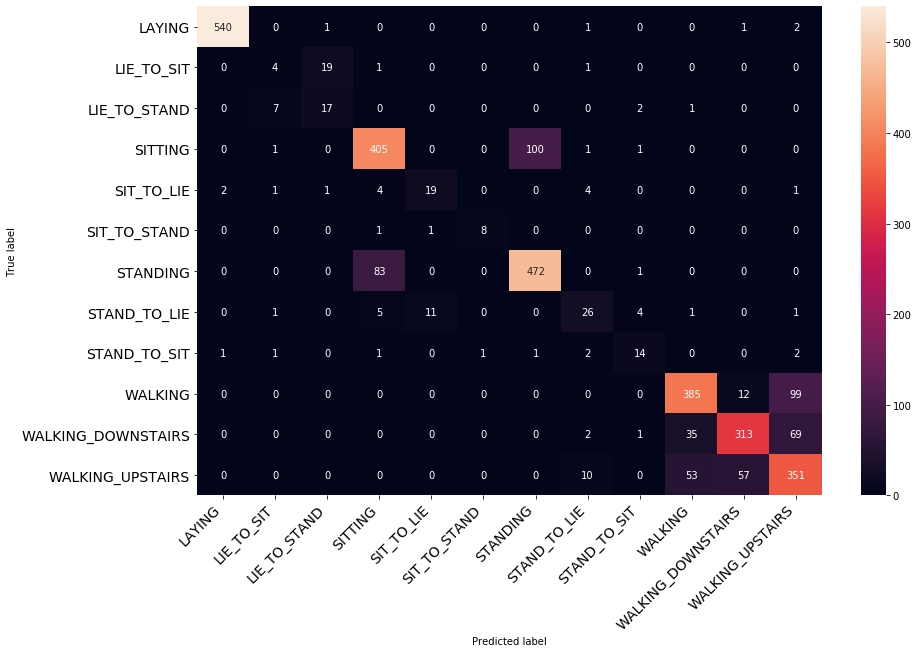

In [66]:
cm = confusion_matrix(y_test.values,y_pred)
print_confusion_matrix(cm, np.unique(y_pred), figsize = (14,9), fontsize=14)

In [67]:
# To get the best random search attributes for the model
print("Best estimator : ", decisionTree_classifier_rs.best_estimator_)
print("Best set of parameters : ", decisionTree_classifier_rs.best_params_)
print("Best score : ", decisionTree_classifier_rs.best_score_)

Best estimator :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best set of parameters :  {'max_depth': 10}
Best score :  0.846017298689546


## Creation of Random Forest classifier with hyperparameter Tuning

In [68]:
parameters = {'n_estimators': np.arange(40,100,10), 'max_depth':np.arange(6,18,2)}
randomForest_classifier = RandomForestClassifier()
randomForest_classifier_rs = RandomizedSearchCV(randomForest_classifier, param_distributions=parameters,random_state = 12)
randomForest_classifier_rs.fit(X_train, y_train)
y_pred = randomForest_classifier_rs.predict(X_test)

In [69]:

randomForest_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", randomForest_accuracy)

algo.append("Random forest")
scores.append(randomForest_accuracy)

Accuracy using Random forest :  0.9108159392789373


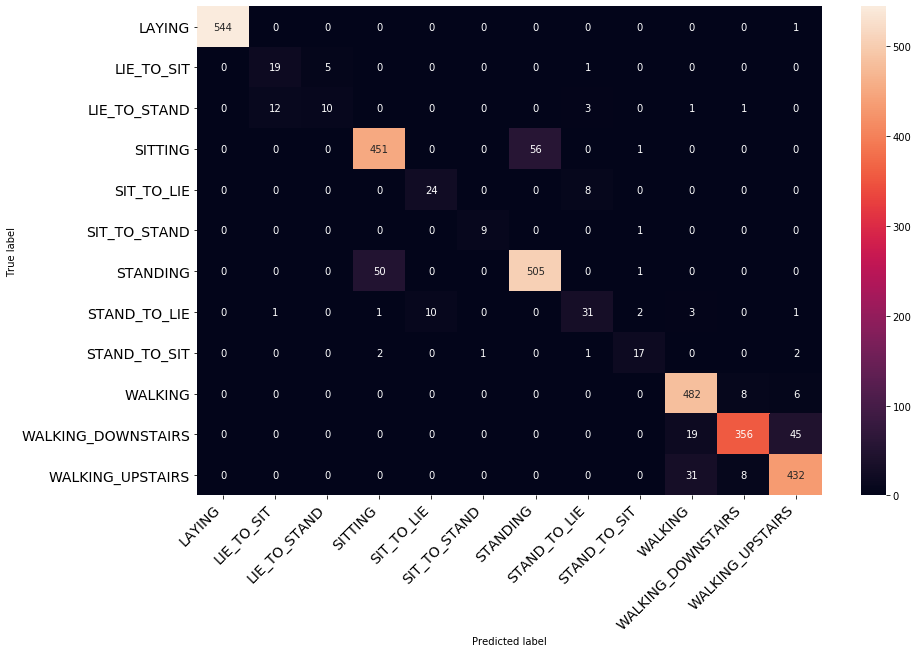

In [70]:
cm = confusion_matrix(y_test.values,y_pred)
print_confusion_matrix(cm, np.unique(y_pred), figsize = (14,9), fontsize=14)

In [71]:
# To get the best random search attributes for the model
print("Best estimator : ", randomForest_classifier_rs.best_estimator_)
print("Best set of parameters : ", randomForest_classifier_rs.best_params_)
print("Best score : ", randomForest_classifier_rs.best_score_)

Best estimator :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best set of parameters :  {'n_estimators': 70, 'max_depth': 16}
Best score :  0.908719703053251


# Comparison of models

In [72]:
score_series = pd.Series([logisticRegression_accuracy,lgbm_accuracy,linear_SVCm_accuracy,decisionTree_accuracy,randomForest_accuracy],['Logistic regression','Lgbm','Linear SVC','Decision tree','Random forest'])

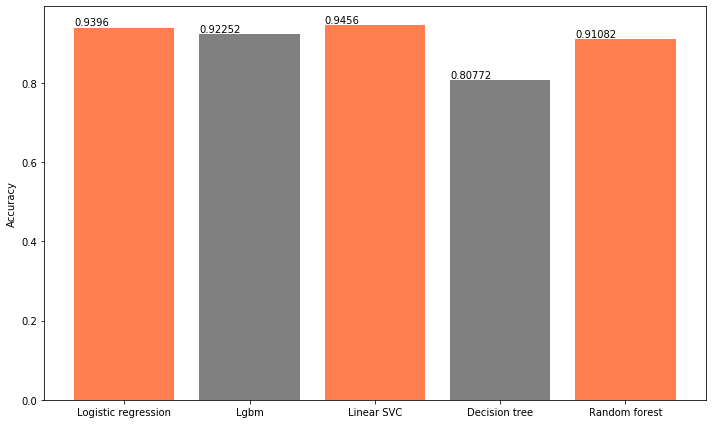

In [73]:
fig = plt.figure(figsize=(10,6))

bars=plt.bar(score_series.index,score_series.values,color=['coral', 'grey', 'coral', 'grey', 'coral'])

ax = fig.add_subplot(111) # Create matplotlib axes
ax.set_ylabel('Accuracy')

for bar in bars:
    yval = round(bar.get_height(),5)
    plt.text(bar.get_x(), yval + .005, yval)
    
plt.tight_layout()
plt.show()



**The model that gives me the best accuracy is the linear SVC model, we can predict the activity of the person with an accuracy close to 95%**

# Serialising our Prediction Model

**Joblib's dump method makes it easy to serialise a model**

In [74]:
dump(linear_SVCm_rs, 'HumanActivitiesRecognition.joblib') 

['HumanActivitiesRecognition.joblib']

# Test loading the model and using it

In [75]:
loaded_classifier = load('HumanActivitiesRecognition.joblib') 

y_pred = loaded_classifier.predict(X_test)

loaded_classifier_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)

print("Accuracy using linear SVC : ",loaded_classifier_accuracy)


Accuracy using linear SVC :  0.9456040480708412


**Above we can see that I can load and use the linear SVC model previously serialised**